# Perceptron

## Bibliotecas

In [1]:
# Bibliotecas de manipualção e visualização de dados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Classes dos modelo

from sklearn.linear_model import Perceptron

# Funções de avaliação dos modelos

from sklearn.metrics import (confusion_matrix, 
                             ConfusionMatrixDisplay,
                             classification_report)

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

---

## Importação dos dados

In [2]:
# Carregando o dataset

dataset = pd.read_csv("https://raw.githubusercontent.com/cynthiamaia/Monitoria-DeepLearning-CIN-AI/main/Datasets/Iris.csv")

# Mapeando os valores da classe para inteiro (para fins de visualização da região de decisão)

dataset['Species'] = pd.factorize(dataset['Species'])[0]

In [4]:
# Vamos usar somente duas features PetalLengthCm e PetalWidthCm
X = dataset.iloc[:,[2,3]]
y = dataset.iloc[:,[4]]

# para treinar e avaliar um classificador, precisamos dividir o dataset em dois conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

#stratify -> garantir que a proporção das classes da variável alvo (y) seja mantida 

In [7]:
y_test.head()

,Species
5,0
142,2
52,1
79,1
103,2


---

## Treinamento

In [6]:
# ... referenciando o modelo
model = Perceptron()

# treinando o modelo
model.fit(X_train, y_train)

# predição
y_pred = model.predict(X_test)

In [25]:
# qual o resultado para esse classificador?
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.31      0.47        13
           2       0.57      1.00      0.73        12

    accuracy                           0.76        38
   macro avg       0.86      0.77      0.73        38
weighted avg       0.86      0.76      0.73        38



[[0.41666667 0.58333333 0.        ]
 [0.         1.         0.        ]
 [0.         0.53846154 0.46153846]]

 Labels:[0 1 2] 



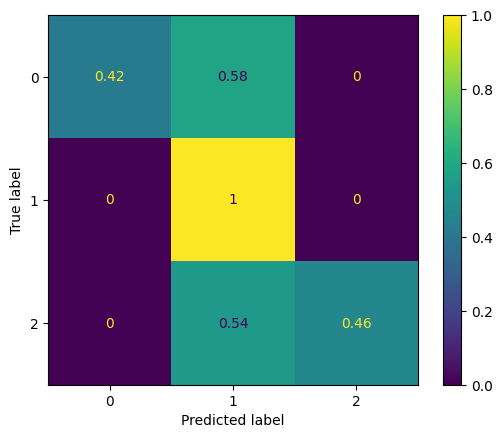

In [8]:
# a função confusion matrix retorna uma matriz com a contagem de como cada 
# uma das classes está sendo classificada corretamente ou erroneamente

cm = confusion_matrix(y_test, y_pred, labels=model.classes_, normalize="true")
print(cm)

print(f"\n Labels:{model.classes_} \n")

#display_labels - define como será a ordem das classes na matriz
disp_cm = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
disp_cm.plot()

In [9]:
def show_decision_region(X, y, model):
    feature_0 = X.columns[0]
    feature_1 = X.columns[1]

    plot_decision_regions(np.array([X[feature_0].values,
                                    X[feature_1].values]).T,
                                    y.values.flatten(), model)
    plt.xlabel(feature_0)
    plt.ylabel(feature_1)

    plt.title(model.__class__.__name__)
    plt.show()

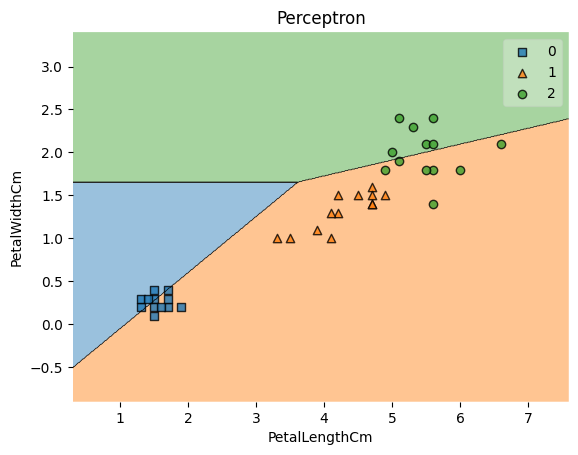

In [10]:
show_decision_region(X_test, y_test, model)
